In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = np.array([
    [0.1, 0.6],  # P1
    [0.15, 0.71],  # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85],  # P4
    [0.2, 0.3],  # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2]   # P8
])


In [3]:
m1 = np.array([0.1, 0.6])  # P1
m2 = np.array([0.3, 0.2])  # P8


In [4]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [5]:
def assign_clusters(points, m1, m2):
    cluster_1 = []
    cluster_2 = []
    
    for point in points:
        d1 = euclidean_distance(point, m1)
        d2 = euclidean_distance(point, m2)
        
        if d1 < d2:
            cluster_1.append(point)
        else:
            cluster_2.append(point)
    
    return np.array(cluster_1), np.array(cluster_2)

In [6]:
def calculate_new_centroids(cluster_1, cluster_2):
    new_m1 = np.mean(cluster_1, axis=0) if len(cluster_1) > 0 else m1
    new_m2 = np.mean(cluster_2, axis=0) if len(cluster_2) > 0 else m2
    return new_m1, new_m2


In [7]:
def k_means_clustering(points, m1, m2):
    # Step 1: Assign points to the nearest centroid
    cluster_1, cluster_2 = assign_clusters(points, m1, m2)
    
    # Step 2: Calculate new centroids
    new_m1, new_m2 = calculate_new_centroids(cluster_1, cluster_2)
    
    return cluster_1, cluster_2, new_m1, new_m2

In [8]:
cluster_1, cluster_2, new_m1, new_m2 = k_means_clustering(points, m1, m2)

In [9]:
# Question 1: Which cluster does P6 belong to?
p6 = np.array([0.25, 0.5])
d1 = euclidean_distance(p6, m1)
d2 = euclidean_distance(p6, m2)
p6_cluster = 1 if d1 < d2 else 2

In [10]:
# Question 2: What is the population of the cluster around m2?
population_cluster_2 = len(cluster_2)

In [11]:
# Question 3: What are the updated values of m1 and m2?
updated_m1 = new_m1
updated_m2 = new_m2


In [12]:
# Output the results
print(f"Cluster 1 (C1):\n{cluster_1}")
print(f"Cluster 2 (C2):\n{cluster_2}")
print(f"Updated m1: {updated_m1}")
print(f"Updated m2: {updated_m2}")

# Answer to the questions:
print(f"\nAnswer to the questions:")
print(f"1. P6 belongs to Cluster {p6_cluster}")
print(f"2. The population of Cluster C2 (around m2) is: {population_cluster_2}")
print(f"3. The updated centroids are m1: {updated_m1} and m2: {updated_m2}")

Cluster 1 (C1):
[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
Cluster 2 (C2):
[[0.2  0.3 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]
Updated m1: [0.148 0.712]
Updated m2: [0.24666667 0.2       ]

Answer to the questions:
1. P6 belongs to Cluster 1
2. The population of Cluster C2 (around m2) is: 3
3. The updated centroids are m1: [0.148 0.712] and m2: [0.24666667 0.2       ]


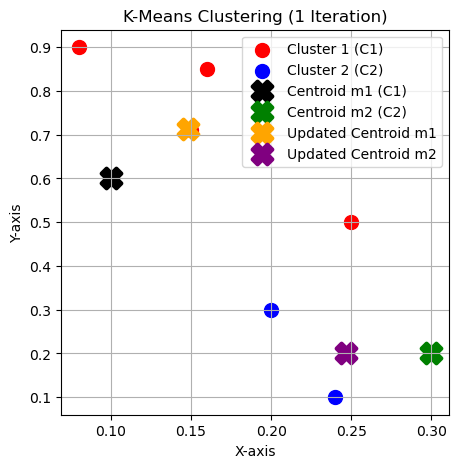

In [16]:
plt.figure(figsize=(5,5))

# Plot Cluster 1 in red
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='red', label='Cluster 1 (C1)', s=100)

# Plot Cluster 2 in blue
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], color='blue', label='Cluster 2 (C2)', s=100)

# Plot the centroids (m1 and m2)
plt.scatter(m1[0], m1[1], color='black', marker='X', s=200, label='Centroid m1 (C1)', linewidth=3)
plt.scatter(m2[0], m2[1], color='green', marker='X', s=200, label='Centroid m2 (C2)', linewidth=3)

# Plot the updated centroids
plt.scatter(updated_m1[0], updated_m1[1], color='orange', marker='X', s=200, label='Updated Centroid m1', linewidth=3)
plt.scatter(updated_m2[0], updated_m2[1], color='purple', marker='X', s=200, label='Updated Centroid m2', linewidth=3)

# Labeling the points and adding legend
plt.title("K-Means Clustering (1 Iteration)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()
